<a href="https://colab.research.google.com/github/Poscom2010/Wk6-IoT_ML_smart_Systems/blob/main/Copy_of_garbage_classifier_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marayo44wains","key":"0f3a90469859086a51aa2c11b3003d9b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving garbage_classification..zip to garbage_classification..zip


In [ ]:
import zipfile
import os

zip_path = "garbage_classification..zip"  # notice the double dots
extract_path = "/content/garbage_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check contents
os.listdir(extract_path)




['garbage_classification']

In [ ]:
import os

base_dir = '/content/garbage_dataset'
print(os.listdir(base_dir))


['garbage_classification']


In [ ]:
import os

folder_path = '/content/garbage_dataset'
print(os.listdir(folder_path))



['garbage_classification']


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Base paths
base_dir = '/content/garbage_dataset/garbage_classification'
train_dir = '/content/data_split/train'
val_dir = '/content/data_split/validation'

# Create train and validation folders
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(val_dir):
    os.makedirs(val_dir)

# List class names
classes = os.listdir(base_dir)

for class_name in classes:
    class_path = os.path.join(base_dir, class_name)
    images = os.listdir(class_path)

    # Train-validation split
    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

    # Create class subfolders in train/ and validation/
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

    # Move files
    for img in train_imgs:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_dir, class_name, img)
        shutil.copy2(src, dst)

    for img in val_imgs:
        src = os.path.join(class_path, img)
        dst = os.path.join(val_dir, class_name, img)
        shutil.copy2(src, dst)

print("✅ Data split into training and validation sets.")


✅ Data split into training and validation sets.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up image generators
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values
    rotation_range=20,       # Randomly rotate images
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,         # Shear transform
    zoom_range=0.2,          # Zoom transform
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'      # Fill in missing pixels
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    '/content/data_split/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/data_split/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 12409 images belonging to 12 classes.
Found 3106 images belonging to 12 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')  # 12 classes
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 766s 2s/step - accuracy: 0.4287 - loss: 1.8079 - val_accuracy: 0.5734 - val_loss: 1.2707
Epoch 2/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 753s 2s/step - accuracy: 0.5802 - loss: 1.2661 - val_accuracy: 0.6423 - val_loss: 1.0630
Epoch 3/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 750s 2s/step - accuracy: 0.6151 - loss: 1.1336 - val_accuracy: 0.6700 - val_loss: 1.0389
Epoch 4/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 748s 2s/step - accuracy: 0.6359 - loss: 1.0898 - val_accuracy: 0.6784 - val_loss: 1.0453
Epoch 5/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 757s 2s/step - accuracy: 0.6554 - loss: 1.0327 - val_accuracy: 0.6974 - val_loss: 0.9492
Epoch 6/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 750s 2s/step - accuracy: 0.6782 - loss: 0.9682 - val_accuracy: 0.7102 - val_loss: 0.9240
Epoch 7/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 767s 2s/step - accuracy: 0.6930 - loss: 0.9278 - val_accuracy: 0.7392 - val_loss: 0.8089
Epoch 8/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 791s 2s/step - accuracy: 0.6965 - loss: 0.9109 - val_accu

In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 437ms/step - accuracy: 0.7424 - loss: 0.8004
Validation Accuracy: 74.98%
Validation Loss: 0.7935


In [ ]:
model.save("garbage_classifier_model.h5")
print("Model saved successfully.")


Model saved successfully.


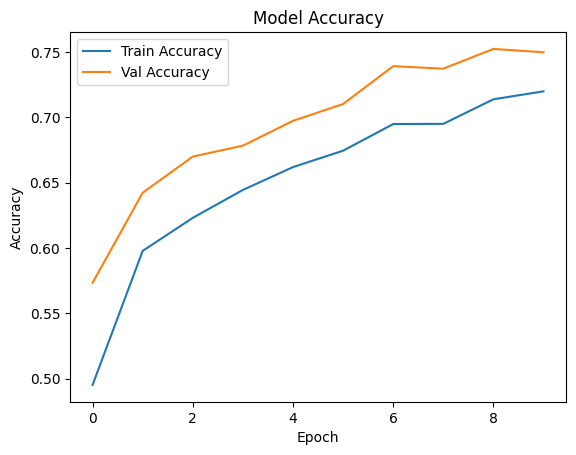

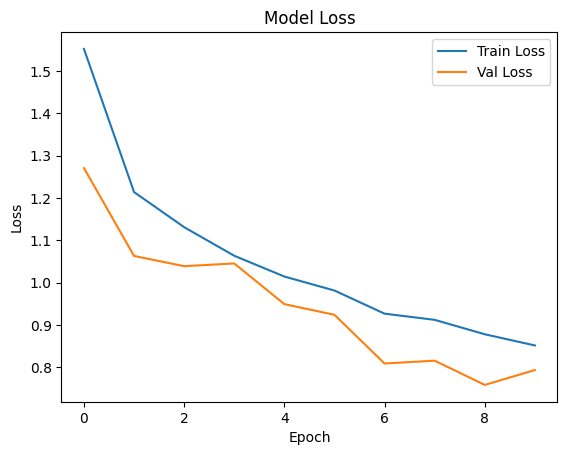

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("garbage_classifier_model.h5")
print("Model loaded successfully.")


Model loaded successfully.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving pexels-felix-57767809-33089105.jpg to pexels-felix-57767809-33089105.jpg


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Step 2: Load the image and resize to 150x150 (same as training images)
img = load_img(img_path, target_size=(150, 150))
img_array = img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Step 3: Make prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
confidence = np.max(predictions)

# Step 4: Map prediction to class label
class_labels = list(train_generator.class_indices.keys())
print(f"✅ Predicted class: {class_labels[predicted_class_index]} ({confidence*100:.2f}% confidence)")


Saving pexels-felix-57767809-33089105.jpg to pexels-felix-57767809-33089105 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
✅ Predicted class: shoes (83.70% confidence)


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = list(uploaded.keys())[0]  # First uploaded image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match your training input size
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


In [ ]:
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
confidence = np.max(predictions)

# Get class labels (must match training order)
class_labels = list(train_generator.class_indices.keys())

print(f"Predicted class: {class_labels[predicted_class_index]} ({confidence*100:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted class: shoes (83.70% confidence)


In [ ]:
import os
from pathlib import Path

# Set dataset directory
data_dir = Path("/content/garbage_dataset/garbage_classification")

# Check some categories
classes = os.listdir(data_dir)
print(f"Found {len(classes)} classes: {classes}")


Found 12 classes: ['shoes', 'brown-glass', 'battery', 'white-glass', 'clothes', 'green-glass', 'paper', 'plastic', 'biological', 'metal', 'cardboard', 'trash']


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # One output per class
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,900 (18.42 MB)

 Trainable params: 4,829,900 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.save("garbage_classifier_model.h5")
